# Project 1
### Author: Lexi Shewchuk
### Date: Saturday, 17 July

In [1]:
import sklearn.linear_model as lm
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random

## Part 1: Logistic Regression for Digit Classification
The goal of this part is to train a logistic regression model that can take in 28x28 pixel greyscale images of handwritten 8s and 9s, and identiies each image as an 8 or a 9. A logistic regression model is trained on the given train data-digits_8_vs_9_noisy dataset. Several model hyperparameters were altered and used to generate different models in order to find a model that correctly classifies the training data.

### 1.1: Fit logistic regression models and explore different max_iter values

In [ ]:
# load in the datasets and turn into ndarrays
# make y data into 1D arrays using ravel()
x_train = pd.read_csv('data_digits_8_vs_9_noisy/x_train.csv').to_numpy()
y_train = pd.read_csv('data_digits_8_vs_9_noisy/y_train.csv').to_numpy().ravel()
x_test = pd.read_csv('data_digits_8_vs_9_noisy/x_test.csv').to_numpy()
y_test = pd.read_csv('data_digits_8_vs_9_noisy/y_test.csv').to_numpy().ravel()

# explore what happens with varying max_iter values
# keep track of accuracy and log loss
accuracy = list()
log_losses = list()
models = list()

# create logistic regression models and train on x_train data
# all params are default except solver = 'liblinear' and max_iter
# for small max_iter (<10), liblinear will fail to converge
iter_values = list(range(1, 41, 1))
for i in iter_values:
    log_model = lm.LogisticRegression(solver='liblinear', max_iter=i)
    log_model.fit(x_train, y_train)
    y_test_pred = log_model.predict(x_test)
    accuracy.append(log_model.score(x_test, y_test))
    log_losses.append(metrics.log_loss(y_test, y_test_pred))
    models.append(log_model)

In [ ]:
# plot accuracy
plt.title('Model Accuracy vs Maximum Iterations')
plt.xlabel('maximum iterations')
plt.ylabel('accuracy')
plt.scatter(iter_values, accuracy)
plt.show()

# plot error
plt.title('Logistic Loss vs Maximum Iterations')
plt.xlabel('maximum iterations')
plt.ylabel('logistic loss')
plt.scatter(iter_values, log_losses, c='r')
plt.show()

### Discussion:
The above plots demonstrate that at the maximum interations increase, accuracy increases and loss decreases. For logistic regression, a model is trained by adjusting weights to minimize error on a given datum. When the number of iterations that the model is allowed to undergo is low (making the step size alpha larger), the amount of adjustement -- and therefore fitting -- decreases. This often prevents the loss from reaching a minimum, meaning that the model isn't as accurate as it could be.
Log loss and accuracy are very closely related. Log loss is reduced by labeling positive examples as closer to 1, and negative examples as closer to 0 -- in other words, an accurately labeled datum reduces loss.

In [ ]:
## 1.2: 
# get the first weight for all 40 models
coeffs = list()
for model in models:
    coeffs.append(model.coef_[0, 0])
print(coeffs[38])
# plot first weight vs iter value
plt.title('First Weight vs Maximum Iterations')
plt.xlabel('maximum iterations')
plt.ylabel('first weight')
plt.scatter(iter_values, coeffs);    

### Discussion:
This plot demonstrates that increasing the number of iterations allows for the weights to adjust more, and the ideal weight applied to pixel000 should be about -0.44 for the most accurate model. Initally, because max_iter is set so low, the model isn't able to sufficiently adjust weight and actually fit the training data, so the inital weight on the first pixel is nearer to zero.
It's likely that the model determines that the first pixel, which would lie in the top left corner of the image, shouldn't have a great deal of sway in the determination of the digit, so if there is a relatively high value for that pixel, it shouldn't contribute greatly to the classification. 

In [ ]:
# 1.3
c_grid = np.logspace(-9, 6, 31)
min_loss = 10_000_000
best_model = lm.LogisticRegression()

# smaller C means larger penalty (stronger regularization)
for c in c_grid:
    model = lm.LogisticRegression(solver='liblinear', C=c)
    model.fit(x_train, y_train)
    loss = metrics.log_loss(y_test, model.predict(x_test))
    if loss < min_loss:
        best_model = model
        min_loss = loss
y_test_pred = best_model.predict(x_test)

In [ ]:
print("Least loss:", min_loss)
print("Best model's accuracy:", best_model.score(x_test, y_test))

# generate confusion matrix for best model
conf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
sb.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True Value')
plt.xlabel('Predicted Value')
plt.show();


In [ ]:
# 1.4

# get lists of false positives and false negatives
false_pos = list()
false_neg = list()
for i in range(len(x_test)):
    if y_test[i] == 1 and y_test_pred[i] == 0:
        false_neg.append(x_test[i])
    elif y_test[i] == 0 and y_test_pred[i] == 1:
        false_pos.append(x_test[i])

# plot 9 random false positives
plt.figure(figsize=(10, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    rand_num = random.randrange(0, len(false_pos))
    plt.imshow(false_pos[rand_num].reshape(28, -1), cmap='Greys', vmin=0.0, vmax=1.0)
    plt.title('Predicted: 1, Actual: 0')
plt.show()

# plot 9 random false negatives
plt.figure(figsize=(10, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    rand_num = random.randrange(0, len(false_neg))
    plt.imshow(false_neg[rand_num].reshape(28, -1), cmap='Greys', vmin=0.0, vmax=1.0)
    plt.title('Predicted: 0, Actual: 1')
plt.show()

For false positives, which in my case means 8s that have been mislabeled as 9s, many have a bottom loop that's very skinny or they're tilted right a bit. This makes sense because most 9s can be identified by having a stick at the base rather than a loop, so a skinny bottom would resemble a 9.
False negatives -- 9s that have been mislabelled as 8s -- often have very loopy or wide tails, similar to the base of an 8. 

In [ ]:
# 1.5
coeffs = np.array(best_model.coef_).reshape(28,28)

plt.title('Pixel Influence')
plt.imshow(coeffs, cmap='RdYlBu', vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.show()

This colormap shows that the pixels most commonly found in 8s -- and thus have the most influence in classifying the example as an 8 -- are centered around (13,20), and follow a curvy crescent shape that you would see from at the base of a typical handwritten 8.
The pixels that are most influential in determining a 9 are around (17,12), where the joint between the circle and stick of a 9 would be.
This colormap provides some insight into the shapes of numbers that are misclassified. False negatives -- 9s that are labeled 8s -- often have loopy bottoms that go through the very negative-pixel region. False postives -- true 8s labeled as 9s -- often have a dense area where the joint of a 9 would be, and thus have more positive weights at those pixel locations.

## Part 2: Shirt Classification

In [2]:
# load in the datasets
x_train = pd.read_csv('data_shirts/train_shirt_x.csv').to_numpy()
y_train = pd.read_csv('data_shirts/train_shirt_y.csv').to_numpy().ravel()
x_test = pd.read_csv('data_shirts/test_shirt_x.csv').to_numpy()

In [ ]:
# add flip of every datum to dataset
sym_x_train = list(x_train.copy())
sym_y_train = list(y_train.copy())
sym_y_train += sym_y_train

for i in range(len(x_train)):
    flipped = x_train[i].copy().tolist()
    flipped.reverse()
    sym_x_train.append(flipped)
sym_x_train = np.array(sym_x_train)
sym_y_train = np.array(sym_y_train)

In [ ]:
# make a smaller data set for dev purposes 
small_x = np.array([x_train[i] for i in range(20)])
small_y = np.array([y_train[i] for i in range(20)])


In [ ]:
# sym small version
sym_small_x = list(small_x.copy())
sym_small_y = list(small_y.copy())
sym_small_y += sym_small_y

for i in range(len(small_x)):
    flipped = small_x[i].copy().tolist()
    flipped.reverse()
    sym_small_x.append(flipped)
sym_small_x = np.array(sym_small_x)
sym_small_y = np.array(sym_small_y)

In [4]:
# functions to for performance metrics

def acc(model, x, y):
    return model.score(x, y)

def loss(y, y_pred):
    return metrics.log_loss(y, y_pred)

In [5]:
# k-fold corss-validation functions

# get your training and validation sets for a single fold
def get_train_and_validate_sets(fold_num, k, x, y):
    fold_x_validate = list()
    fold_y_validate = list()
    fold_x_train = list()
    fold_y_train = list()

    for i in range(len(x)):
        if i % k == fold_num:
            fold_x_validate.append(x[i])
            fold_y_validate.append(y[i])
        else:
            fold_x_train.append(x[i])
            fold_y_train.append(y[i])

    return fold_x_validate, fold_y_validate, fold_x_train, fold_y_train

# get the average loss and accuracy of a given model, using k-fold cross-validation
def get_k_fold_loss_and_acc(model, k, x, y):
    loss_list = list()
    acc_list = list()

    for fold_num in range(k):
        fold_x_validate, fold_y_validate, fold_x_train, fold_y_train = get_train_and_validate_sets(fold_num, k, x, y)
        model.fit(fold_x_train, fold_y_train)
        fold_y_validate_pred = model.predict(fold_x_validate)
        loss_list.append(loss(fold_y_validate, fold_y_validate_pred))
        acc_list.append(acc(model, fold_x_validate, fold_y_validate))
    return np.average(loss_list), np.average(acc_list)

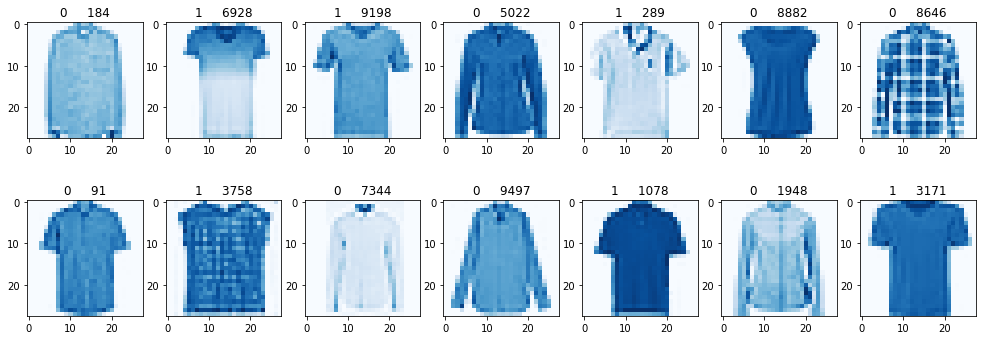

In [3]:
# look at some of the images
plt.figure(figsize=(17, 6))
for i in range(1, 15):
    plt.subplot(2, 7, i)
    rand_num = random.randrange(0, len(x_train))
    datum = x_train[rand_num].reshape(28, -1)
    plt.imshow(datum, cmap='Blues', vmin=0.0, vmax=1.0)
    plt.title(str(y_train[rand_num]) + '     ' + str(rand_num))
plt.show()

In [ ]:
# L2
# train a basic logistic regression model
model = lm.LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
print('acc:  {:4f}'.format(acc(model, x_train, y_train)))
print('loss: {:4f}'.format(loss(y_train, y_train_pred)))

In [ ]:
# L1
# train a basic logistic regression model
model = lm.LogisticRegression(solver='liblinear', penalty='l1')
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
print('acc:  {:4f}'.format(acc(model, x_train, y_train)))
print('loss: {:4f}'.format(loss(y_train, y_train_pred)))

In [ ]:
# look at what mistakes are being made
# 0=not T-shirt,     1=T-shirt
false_pos = list()
false_neg = list()
false_neg_indices = list()
false_pos_indices = list()

for i in range(len(x_train)):
    if y_train[i] == 1 and y_train_pred[i] == 0:
        # false neg -- a T-shirt that's mislabeled
        false_neg.append(x_train[i])
    elif y_train[i] == 0 and y_train_pred[i] == 1:
        # false pos -- a non-T-shirt that's mislabeled
        false_pos.append(x_train[i])

print('image 22:\n   true:', y_train[22], '\n   label:', y_train_pred[22])
plt.imshow(x_train[22].reshape(28, -1), cmap='Blues', vmin=0.0, vmax=1.0)
plt.show()

# plot 9 random false positives 
print("false pos -- a non-T-shirt that's mislabeled")
plt.figure(figsize=(17, 6))
for i in range(1, 15):
    plt.subplot(2, 7, i)
    rand_num = random.randrange(0, len(false_pos))
    plt.imshow(false_pos[rand_num].reshape(28, -1), cmap='Blues', vmin=0.0, vmax=1.0)
plt.show()

# plot 9 random false negatives
print("false neg -- a T-shirt that's mislabeled")
plt.figure(figsize=(17, 6))
for i in range(1, 15):
    plt.subplot(2, 7, i)
    rand_num = random.randrange(0, len(false_neg))
    plt.imshow(false_neg[rand_num].reshape(28, -1), cmap='Blues', vmin=0.0, vmax=1.0)
plt.show()

In [ ]:
# L2, Cross-validated
model = lm.LogisticRegression(solver='liblinear')
avg_loss, avg_acc = get_k_fold_loss_and_acc(model, 5, x_train, y_train)

print('avg loss: {:4f}', avg_loss)
print('avg acc:  {:4f}', avg_acc)

In [ ]:
# L1, Cross-validated
avg_loss, avg_acc = get_k_fold_loss_and_acc(model, 5, x_train, y_train)

model = lm.LogisticRegression(solver='liblinear', solver='l1')
print('avg loss: {:4f}', avg_loss)
print('avg acc:  {:4f}', avg_acc)

In [ ]:
# L2, Cross-validated, C = 
model = lm.LogisticRegression()
c_grid = np.logspace(-4, 4, 20)
best_l2_c = c_grid[0]
best_loss = 10_000_000
best_acc = 0

for c in c_grid:
    c_model = lm.LogisticRegression(solver='liblinear', C=c, max_iter=100)
    c_loss, c_acc = get_k_fold_loss_and_acc(c_model, 5, x_train, y_train)
    if c_loss < best_loss:
        model = c_model
        best_loss = c_loss
        best_acc = c_acc
        best_l2_c = c
    print('    c:', c)
print('best c:   {:.4f}'.format(best_l2_c))
print('avg loss: {:.4f}'.format(best_loss))
print('avg acc:  {:.4f}'.format(best_acc))

In [ ]:
# make color map from best model
coeffs = np.array(model.coef_).reshape(28,28)

plt.title('Pixel Influence')
plt.imshow(coeffs, cmap='RdBu', vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.show()

In [ ]:
# L1, cross-validated, C=

model = lm.LogisticRegression()
c_grid = np.logspace(-4, 4, 20)
best_l1_c = c_grid[0]
best_loss = 10_000_000
best_acc = 0

for c in c_grid:
    c_model = lm.LogisticRegression(solver='liblinear', C=c, max_iter=100, penalty='l1')
    c_loss, c_acc = get_k_fold_loss_and_acc(c_model, 5, x_train, y_train)
    if c_loss < best_loss:
        model = c_model
        best_loss = c_loss
        best_acc = c_acc
        best_l1_c = c
    print('   c:', c)
print('best c:   {:.4f}'.format(best_l1_c))
print('avg loss: {:.4f}'.format(best_loss))
print('avg acc:  {:.4f}'.format(best_acc))

In [ ]:
# make color map from best model
coeffs = np.array(model.coef_).reshape(28,28)

plt.title('Pixel Influence')
plt.imshow(coeffs, cmap='RdBu', vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.show()

In [ ]:
# L2, cross-validated, symmetrical, C=
model = lm.LogisticRegression()
c_grid = np.logspace(-4, 4, 20)
best_l2_c = c_grid[0]
best_loss = 10_000_000
best_acc = 0

for c in c_grid:
    c_model = lm.LogisticRegression(solver='liblinear', C=c, max_iter=100)
    c_loss, c_acc = get_k_fold_loss_and_acc(c_model, 5, sym_x_train, sym_y_train)
    if c_loss < best_loss:
        model = c_model
        best_loss = c_loss
        best_acc = c_acc
        best_l2_c = c
    print('    c:', c)
print('best c:   {:.4f}'.format(best_l2_c))
print('avg loss: {:.4f}'.format(best_loss))
print('avg acc:  {:.4f}'.format(best_acc))

In [ ]:
# L1, cross-validated, symmetrical, C=

model = lm.LogisticRegression()
c_grid = np.logspace(-4, 4, 20)
best_l1_c = c_grid[0]
best_loss = 10_000_000
best_acc = 0

for c in c_grid:
    c_model = lm.LogisticRegression(solver='liblinear', C=c, max_iter=100, penalty='l1')
    c_loss, c_acc = get_k_fold_loss_and_acc(c_model, 5, sym_x_train, sym_y_train)
    if c_loss < best_loss:
        model = c_model
        best_loss = c_loss
        best_acc = c_acc
        best_l1_c = c
    print('   c:', c)
print('best c:   {:.4f}'.format(best_l1_c))
print('avg loss: {:.4f}'.format(best_loss))
print('avg acc:  {:.4f}'.format(best_acc))

In [ ]:
# l2_best_c = 
# l1_best_c = 

In [ ]:
# L2 and L1, Cross-validated, symmetrical, C=, threshold=
# turn every pixel to 'on' or 'off' by some threshold
thresholds = list()
for i in range(50):
    thresholds.append(i * 2 / 100)
    
l2_model = lm.LogisticRegression(solver='liblinear', max_iter=100, C=best_l2_c)
l2_loss_list = list()
l2_best_loss = 10000000
l2_best_acc = 0
l2_best_threshold = 1

l1_model = lm.LogisticRegression(solver='liblinear', max_iter=100, C=best_l1_c, penalty='l1')
l1_loss_list = list()
l1_best_loss = 10000000
l1_best_acc = 0
l1_best_threshold = 1

for threshold in thresholds:
    print('thresh:', threshold)
    changed_x_train = list()

    for datum in sym_x_train:
        new_datum = list()
        for pixel in datum:
            new_datum.append(1 if pixel >= threshold else 0)
        changed_x_train.append(np.array(new_datum))

    l2_thresh_loss, l2_thresh_acc = get_k_fold_loss_and_acc(l2_model, 5, changed_x_train, sym_y_train)
    l2_loss_list.append(l2_thresh_loss)
    if l2_thresh_loss < l2_best_loss:
        l2_best_loss = l2_thresh_loss
        l2_best_acc = l2_thresh_acc
        l2_best_threshold = l2_threshold

    l1_thresh_loss, l1_thresh_acc = get_k_fold_loss_and_acc(l1_model, 5, changed_x_train, sym_y_train)
    l1_loss_list.append(l1_thresh_loss)
    if l1_thresh_loss < l1_best_loss:
        l1_best_loss = l1_thresh_loss
        l1_best_acc = l1_thresh_acc
        l1_best_threshold = l1_threshold
print('l2 best thresh:  {:.4f}'.format(l2_best_threshold))
print('l2 average loss: {:.4f}'.format(l2_best_loss))
print('l2 average acc:  {:.4f}'.format(l2_best_acc))
print('l1 best thresh:  {:.4f}'.format(l1_best_threshold))
print('l1 average loss: {:.4f}'.format(l1_best_loss))
print('l1 average acc:  {:.4f}'.format(l1_best_acc))

In [ ]:
# L2 loss v threshold and colormap
plt.plot(thresholds, l2_loss_list)
plt.title('Logistic Loss vs Threshold Value with L2 Penalty')
plt.xlabel('threshold value')
plt.ylabel('loss')
plt.show()

coeffs = np.array(l2_model.coef_).reshape(28,28)
plt.title('Pixel Influence')
plt.imshow(coeffs, cmap='RdBu', vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.show()

# L1 loss v threshold and colormap
plt.plot(thresholds, l1_loss_list)
plt.title('Logistic Loss vs Threshold Value with L1 Penalty')
plt.xlabel('threshold value')
plt.ylabel('loss')
plt.show()

coeffs = np.array(model.coef_).reshape(28,28)
plt.title('Pixel Influence')
plt.imshow(coeffs, cmap='RdBu', vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.show()

In [7]:
# smooth pixels
# if most pixels around that pixel are darker, make it darker
# do 2 rounds

def cluster_pixel_set(x):
    new_x = list()

    # each example
    for datum_index in range(len(x)):
        datum = x[datum_index].reshape(28, -1)
        new_datum = list()
        # each pixel
        for row_num in range(datum.shape[1]):
            for col_num in range(datum.shape[0]):
                pixel = datum[row_num, col_num]
                if row_num != 0 and row_num != 27 and col_num != 0 and col_num != 27:
                    surrounding_pixels = [datum[row_num - 1, col_num - 1], datum[row_num, col_num - 1], datum[row_num + 1, col_num - 1], \
                                datum[row_num - 1, col_num],                           datum[row_num + 1, col_num], \
                                datum[row_num - 1, col_num + 1], datum[row_num, col_num + 1], datum[row_num + 1, col_num + 1]]
                    count_greater = 0
                    count_less = 0
                    for nearby_pixel in surrounding_pixels:
                        if nearby_pixel > pixel:
                            count_greater += 1
                        elif nearby_pixel < pixel:
                            count_less += 1
                    if count_greater >= 6:
                        new_datum.append(np.mean([p for p in surrounding_pixels if p >= pixel]))
                    elif count_less >= 6:
                        new_datum.append(np.mean([p for p in surrounding_pixels if p <= pixel]))
                    else:
                        new_datum.append(pixel)
                else:
                    new_datum.append(pixel)
        new_x.append(new_datum)
    return np.array(new_x)


changed_x_train_round1 = cluster_pixel_set(sym_x_train)
changed_x_train = cluster_pixel_set(changed_x_train_round1)
    
changed_x_train = np.array(changed_x_train)

: 10823
datum num: 10824
datum num: 10825
datum num: 10826
datum num: 10827
datum num: 10828
datum num: 10829
datum num: 10830
datum num: 10831
datum num: 10832
datum num: 10833
datum num: 10834
datum num: 10835
datum num: 10836
datum num: 10837
datum num: 10838
datum num: 10839
datum num: 10840
datum num: 10841
datum num: 10842
datum num: 10843
datum num: 10844
datum num: 10845
datum num: 10846
datum num: 10847
datum num: 10848
datum num: 10849
datum num: 10850
datum num: 10851
datum num: 10852
datum num: 10853
datum num: 10854
datum num: 10855
datum num: 10856
datum num: 10857
datum num: 10858
datum num: 10859
datum num: 10860
datum num: 10861
datum num: 10862
datum num: 10863
datum num: 10864
datum num: 10865
datum num: 10866
datum num: 10867
datum num: 10868
datum num: 10869
datum num: 10870
datum num: 10871
datum num: 10872
datum num: 10873
datum num: 10874
datum num: 10875
datum num: 10876
datum num: 10877
datum num: 10878
datum num: 10879
datum num: 10880
datum num: 10881
datum 

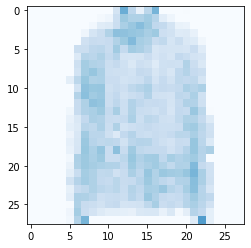

In [8]:
# show original vs smoothed example
plt.imshow(sym_x_train[5].reshape(28, -1), cmap='Blues', vmin=0.0, vmax=1.0)
plt.show()
plt.imshow(changed_x_train[5].reshape(28, -1), cmap='Blues', vmin=0.0, vmax=1.0)
plt.show()

In [9]:
# L2, cross-validated, symmetrical, C=, smoothed
print('l2 smoothed:')
model = lm.LogisticRegression(solver='liblinear', max_iter=100, C=best_l2_c)
l, a = get_k_fold_loss_and_acc(model, 5, changed_x_train, sym_y_train)
print('avg loss: {:.4f}'.format(l))
print('avg acc:  {:.4f}'.format(a))

# L1, cross-validated, symmetrical, C=, smoothed
print('\nl1 smoothed:')
model = lm.LogisticRegression(solver='liblinear', max_iter=100, C=best_l1_c, penalty='l1')
l, a = get_k_fold_loss_and_acc(model, 5, changed_x_train, sym_y_train)
print('avg loss: {:.4f}'.format(l))
print('avg acc:  {:.4f}'.format(a))

l2 clustered:
best loss: 5.071512832497097
best acc:  0.8531666666666666

l1 clustered:
best loss: 5.028336096980619
best acc:  0.8544166666666666


In [35]:
# L2 and L1, cross-validated, symmetrical, C=, smoothed, threshold=
# turn every pixel to 'on' or 'off' by some threshold
thresholds = list()
for i in range(50):
    thresholds.append(i * 2 / 100)
    
l2_model = lm.LogisticRegression(solver='liblinear', max_iter=100, C=best_l2_c)
l2_loss_list = list()
l2_best_loss = 10000000
l2_best_acc = 0
l2_best_threshold = 1

l1_model = lm.LogisticRegression(solver='liblinear', max_iter=100, C=best_l1_c, penalty='l1')
l1_loss_list = list()
l1_best_loss = 10000000
l1_best_acc = 0
l1_best_threshold = 1

for threshold in thresholds:
    print('thresh:', threshold)
    changed_x_train = list()

    for datum in sym_x_train:
        new_datum = list()
        for pixel in datum:
            new_datum.append(1 if pixel >= threshold else 0)
        changed_x_train.append(np.array(new_datum))

    l2_thresh_loss, l2_thresh_acc = get_k_fold_loss_and_acc(l2_model, 5, changed_x_train, sym_y_train)
    l2_loss_list.append(l2_thresh_loss)
    if l2_thresh_loss < l2_best_loss:
        l2_best_loss = l2_thresh_loss
        l2_best_acc = l2_thresh_acc
        l2_best_threshold = l2_threshold

    l1_thresh_loss, l1_thresh_acc = get_k_fold_loss_and_acc(l1_model, 5, changed_x_train, sym_y_train)
    l1_loss_list.append(l1_thresh_loss)
    if l1_thresh_loss < l1_best_loss:
        l1_best_loss = l1_thresh_loss
        l1_best_acc = l1_thresh_acc
        l1_best_threshold = l1_threshold
print('l2 best thresh:  {:.4f}'.format(l2_best_threshold))
print('l2 average loss: {:.4f}'.format(l2_best_loss))
print('l2 average acc:  {:.4f}'.format(l2_best_acc))
print('l1 best thresh:  {:.4f}'.format(l1_best_threshold))
print('l1 average loss: {:.4f}'.format(l1_best_loss))
print('l1 average acc:  {:.4f}'.format(l1_best_acc))

0 0
1 1
2 1
3 0
4 1
5 0
6 0
7 0
8 0
9 0
len (24000,)


In [39]:
# symmetrical (CHANGE)
model = lm.LogisticRegression()
c_grid = np.logspace(-4, 4, 20)
best_l2_c = c_grid[0]
best_loss = 10_000_000
best_acc = 0

for c in c_grid:
    c_model = lm.LogisticRegression(solver='liblinear', C=c, max_iter=100)
    c_loss, c_acc = get_k_fold_loss_and_acc(c_model, 5, sym_x_train, sym_y_train)
    if c_loss < best_loss:
        best_loss = c_loss
        best_acc = c_acc
        best_l2_c = c
    print('    c:', c)
print('best c:  ', best_l2_c)
print('avg loss:', best_loss)
print('avg acc: ', best_acc)

    c: 0.0001
    c: 0.00026366508987303583
    c: 0.0006951927961775605
    c: 0.0018329807108324356
    c: 0.004832930238571752
    c: 0.012742749857031334
    c: 0.03359818286283781
    c: 0.08858667904100823
    c: 0.23357214690901212
    c: 0.615848211066026
    c: 1.623776739188721
    c: 4.281332398719396
    c: 11.288378916846883
    c: 29.763514416313132
    c: 78.47599703514607
    c: 206.913808111479
    c: 545.5594781168514
    c: 1438.44988828766
    c: 3792.690190732246
    c: 10000.0
best c:   0.08858667904100823
avg loss: 5.437049881837882
avg acc:  0.8425833333333334


In [40]:
# vary C with L1 penalty
model = lm.LogisticRegression()
c_grid = np.logspace(-4, 4, 20)
best_l1_c = c_grid[0]
best_loss = 10_000_000
best_acc = 0

for c in c_grid:
    c_model = lm.LogisticRegression(solver='liblinear', C=c, max_iter=100, penalty='l1')
    c_loss, c_acc = get_k_fold_loss_and_acc(c_model, 5, sym_x_train, sym_y_train)
    if c_loss < best_loss:
        best_loss = c_loss
        best_acc = c_acc
        best_l2_c = c
    print('    c:', c)
print('best c:   {:.4d}'.format(best_l2_c))
print('avg loss: {:.4d}'.format(best_loss))
print('avg acc:  {:.4d}'.format(best_acc))

    c: 0.0001
    c: 0.00026366508987303583
    c: 0.0006951927961775605
    c: 0.0018329807108324356
    c: 0.004832930238571752
    c: 0.012742749857031334
    c: 0.03359818286283781
    c: 0.08858667904100823
    c: 0.23357214690901212
    c: 0.615848211066026
    c: 1.623776739188721
    c: 4.281332398719396
    c: 11.288378916846883
    c: 29.763514416313132
    c: 78.47599703514607
    c: 206.913808111479
    c: 545.5594781168514
    c: 1438.44988828766
    c: 3792.690190732246
    c: 10000.0
best c:   0.23357214690901212
avg loss: 5.4269757388904365
avg acc:  0.842875


In [42]:
print('best c:   {:.4f}'.format(best_l2_c))
print('avg loss: {:.4f}'.format(best_loss))
print('avg acc:  {:.4f}'.format(best_acc))

best c: 0.2336
avg loss: 5.4270
avg acc:  0.8429
